<!--
CSI-6-ARI Week 5 Tutorial
Supervised Learning with Scikit-Learn
-->


<style>
  :root{
    --bg:#0b1320;
    --fg:#eef3fb;
    --muted:#b9c6dc;
    --card:#ffffff;
    --line:#e6eaf2;
    --soft:#f6f8fb;
    --info:#eef6ff;
    --warn:#fff7e6;
    --task:#fff0f3;
    --ok:#eefaf0;
    --infoLine:#cfe5ff;
    --warnLine:#ffe1a6;
    --taskLine:#ffd1dc;
    --okLine:#bfe8c7;
  }

   
  .markdown, .markdown p, .markdown li, .markdown div { font-size: 16px; line-height: 1.65; }
  h1 { font-size: 36px; margin: 0 0 12px 0; }
  h2 { font-size: 24px; margin: 22px 0 10px 0; }
  h3 { font-size: 19px; margin: 16px 0 8px 0; }

  .hero{
    padding:20px 22px;
    border-radius:18px;
    background:var(--bg);
    color:var(--fg);
    border:1px solid rgba(255,255,255,0.12);
  }
  .hero .subtitle{margin-top:10px;font-size:18px;font-weight:650;color:var(--muted);}
  .hero .meta{margin-top:10px;font-size:14px;color:var(--muted);}

  .grid{display:grid;grid-template-columns:1fr 1fr;gap:12px;margin-top:14px;}
  .card{
    padding:14px 16px;
    border-radius:16px;
    background:var(--card);
    border:1px solid var(--line);
    box-shadow:0 1px 0 rgba(20,30,50,0.04);
  }
  .card h3{margin:0 0 10px 0;font-size:18px;}

  .box{padding:14px 16px;border-radius:16px;border:1px solid var(--line);background:var(--soft);margin:12px 0;}
  .box.info{background:var(--info);border-color:var(--infoLine);}
  .box.warn{background:var(--warn);border-color:var(--warnLine);}
  .box.task{background:var(--task);border-color:var(--taskLine);}
  .box.ok{background:var(--ok);border-color:var(--okLine);}

  .boxtitle{font-weight:850;font-size:18px;margin:0 0 8px 0;display:flex;gap:10px;align-items:center;}

  .badge{
    width:28px;height:28px;
    border-radius:9px;
    display:inline-flex;align-items:center;justify-content:center;
    font-weight:900;font-size:16px;
    border:1px solid rgba(0,0,0,0.08);
  }
  .b-info{background:#dbeafe;color:#1d4ed8;}
  .b-warn{background:#ffedd5;color:#c2410c;}
  .b-task{background:#ffe4e6;color:#be123c;}
  .b-ok{background:#dcfce7;color:#166534;}

  code{background:#f1f5f9;border-radius:6px;padding:1px 6px;}
  details{border:1px dashed #cbd5e1;border-radius:14px;padding:10px 12px;background:#fbfdff;}
  summary{cursor:pointer;font-weight:850;font-size:16px;}
</style>

<div class="hero">
  <h1><b>CSI-6-ARI, Week 5 Tutorial</b></h1>
  <div class="subtitle">Supervised Learning with Scikit-Learn</div>
</div>

<div class="grid">
  <div class="card">
    <h3><b>🎯 Learning outcomes</b></h3>
    <ul>
      <li>Load a tabular dataset, define features <code>X</code> and target <code>y</code> for supervised learning.</li>
      <li>Apply basic preprocessing in Scikit-Learn, including train/test split and standardisation.</li>
      <li>Train and evaluate simple and multiple linear regression models using appropriate metrics.</li>
      <li>Use k-fold cross-validation to compare models, train a gradient boosted tree regressor, interpret feature importance.</li>
    </ul>
  </div>
  <div class="card">
    <h3><b>🧭 How to use this notebook</b></h3>
    <ul>
      <li>Run cells top-to-bottom. Later sections assume earlier variables exist.</li>
      <li>Exercises use an empty code cell. Complete it before opening the answer.</li>
      <li>Answers are in collapsible boxes with explanation.</li>
    </ul>
  </div>
</div>


<div class="box warn">
  <div class="boxtitle"><span class="badge b-warn">⚠️</span> Important</div>
  <ul>
    <li>We keep this notebook intentionally simple, fewer abstractions, fewer helper functions.</li>
    <li>Focus on the algorithmic ideas first, then (optionally) tidy the code later.</li>
  </ul>
</div>


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1) <b>✅ Supervised learning, regression</b>

<div class="box">
  <div class="boxtitle"><span class="badge b-info">🧭</span> Core idea</div>
  <ul>
    <li>
      <b>Supervised learning</b> means we learn a mapping from inputs to outputs using <b>labelled examples</b>.
      Each example has <b>features</b> (inputs, <code>X</code>) and a <b>target</b> (output, <code>y</code>).
      The goal is to learn a model that can <b>generalise</b>, it should make good predictions on <b>new, unseen data</b>.
    </li>
    <li>
      <b>Regression</b> is supervised learning where the target <code>y</code> is a <b>continuous number</b>,
      for example a price, energy consumption, demand, or manufacturing time.
      A regression model outputs a numeric prediction <code>ŷ</code>, and we quantify error using a <b>loss</b> such as squared error.
    </li>
    <li>
      We will follow the standard workflow, define <code>X</code> and <code>y</code>, split into <b>train</b> and <b>test</b> sets,
      fit the model on training data, then evaluate on test data using metrics like <b>MSE</b>, <b>MAE</b>, and <b>R²</b>.
      This helps us check whether performance is real, not just memorising the training set.
    </li>
    <li>
      A key risk is <b>overfitting</b>, a model can look excellent on training data but perform poorly on new data.
      We reduce this risk by using a <b>hold-out test set</b> and <b>cross-validation</b>, and by keeping models appropriately simple for the data.
    </li>
    <li>
      <b>Practical note:</b> many models benefit from preprocessing such as <b>standardisation</b>.
      In Scikit-Learn, we typically combine preprocessing and modelling in a <b>Pipeline</b> so the same steps are applied consistently,
      and to avoid accidental data leakage from the test set into training.
    </li>
  </ul>
</div>


# Scikit-Learn

- Scikit-learn is a free machine learning library for Python.
- Provides a selection of efficient tools for machine learning and statistical modeling including:
     - **Classification:** Identifying which category an object belongs to. Example: Spam detection
     - **Regression:** Predicting a continuous variable based on relevant independent variables. Example: Stock price predictions
     - **Clustering:** Automatic grouping of similar objects into different clusters. Example: Customer segmentation
     - **Dimensionality Reduction:** Seek to reduce the number of input variables in training data by preserving the salient relationships in the data
- Features various algorithms like support vector machine, random forests, and k-neighbours.
- Supports Python numerical and scientific libraries like NumPy and SciPy.


Some popular groups of models provided by scikit-learn include:

- **Clustering:** Group unlabeled data such as KMeans.
- **Cross Validation:** Estimate the performance of supervised models on unseen data.
- **Datasets:** for test datasets and for generating datasets with specific properties for investigating model behavior.
- **Dimensionality Reduction:** Reduce the number of attributes in data for summarization, visualization and feature selection such as Principal component analysis.
- **Ensemble Methods:** Combine the predictions of multiple supervised models.
- **Feature Extraction:** Define attributes in image and text data.
- **Feature Selection:** Identify meaningful attributes from which to create supervised models.
- **Parameter Tuning:** Get the most out of supervised models.
- **Manifold Learning:** Summarize and depicting complex multi-dimensional data.
- **Supervised Models:** A vast array not limited to generalized linear models, discriminate analysis, naive bayes, lazy methods, neural networks, support vector machines and decision trees.
- **Unsupervised Learning Algorithms:** − They include clustering, factor analysis, PCA (Principal Component Analysis), unsupervised neural networks.

Now we need to import important modules from the sklearn.

In [ ]:
# Core library for classical ML algorithms and utilities
import sklearn  # Top-level Scikit-Learn package (gives access to version info, submodules, etc.)

# Built-in datasets
from sklearn import datasets  # Convenient access to example datasets for quick demos

# Regression models
from sklearn.linear_model import LinearRegression  # Ordinary Least Squares linear regression baseline
from sklearn.ensemble import GradientBoostingRegressor  # Tree-based boosting regressor (non-linear, strong baseline)

# Data splitting and evaluation protocols
from sklearn.model_selection import train_test_split  # Split data into train/test sets for hold-out evaluation
from sklearn.model_selection import cross_val_score  # Run k-fold cross-validation and return scores across folds

# Metrics (how we quantify model performance)
from sklearn.metrics import mean_squared_error  # Regression error metric, average squared prediction error
from sklearn.metrics import accuracy_score  # Classification metric, fraction of correct labels (not used for regression)
from sklearn import metrics  # Namespace containing many metrics, utilities, and scoring functions


## 1.1 Importing dataset

The Boston Housing dataset contains information about various houses in Boston through different parameters. This data was originally a part of UCI Machine Learning Repository and has been removed now.
There are 506 samples and 12 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features. We are importing this dataset from the scikit-learn itself.

Let’s start by importing some libraries.


You can download the dataset from the module's VLE site, and upload it to your Jupyter notebook. There are 14 attributes in each case of the dataset. These are as follows:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft. * INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000,
* PTRATIO−pupil−teacher ratio by town,
* LSTAT : % lower status of the population
* MEDV : Median value of owner-occupied homes in $1000's.

In [ ]:
boston = pd.read_csv('Boston.csv')

In [ ]:
bos = boston.drop('Unnamed: 0',axis=1)
bos[:3]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


In [ ]:
# I will rename the 'medv' column with 'price' and 'rm' with 'room' for better understanding

bos.rename(columns={'medv':'price'},inplace=True)
bos.rename(columns={'rm':'room'},inplace=True)
bos[:3]

,crim,zn,indus,chas,nox,room,age,dis,rad,tax,ptratio,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


## 1.2 Data Preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using .isnull()

In [ ]:
bos.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
room,0
age,0
dis,0
rad,0
tax,0


There are no null values in the dataset.

In [ ]:
print(bos.describe())

             crim          zn       indus        chas         nox        room  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

## 1.3 Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. Here, we will use visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable. We will use the histogram plot function from the matplotlib library.

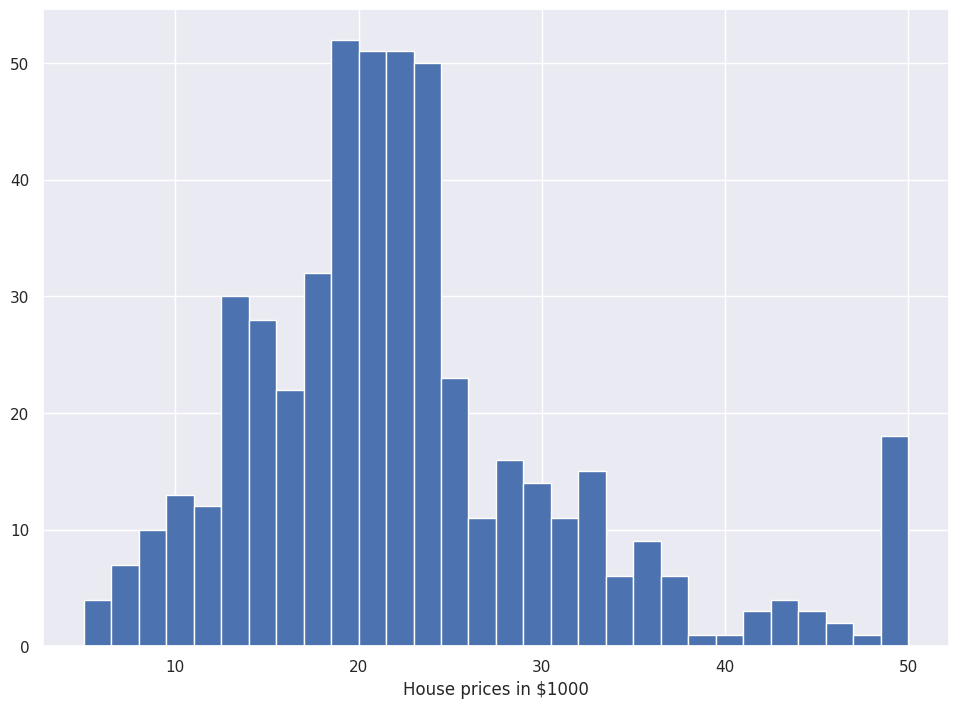

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['price'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

We can see from the plot that the values of price (i.e., medv) are distributed normally with few outliers. Most of the house are around 20–24 range (in $1000 scale).

Now, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

<Axes: >

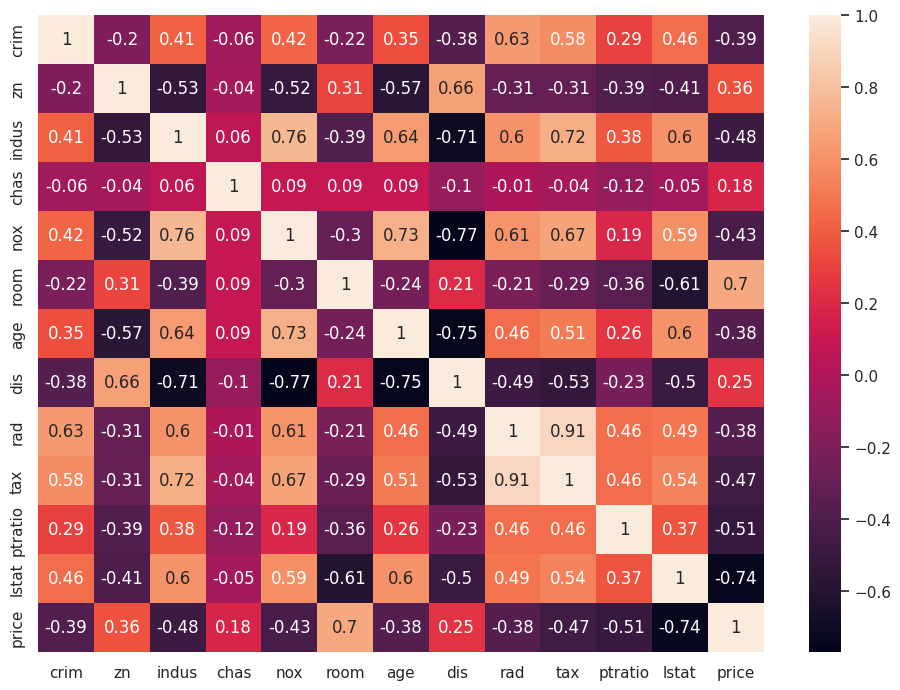

In [ ]:
correlation_matrix = bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.



*   By looking at the correlation matrix we can see that RM has a strong positive correlation with PRICE (0.7) whereas LSTAT has a high negative correlation with PRICE (-0.74).
*   An important point in selecting features for a linear regression model is to check for multicolinearity. The features RAD and TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

But for now we will keep all the features.

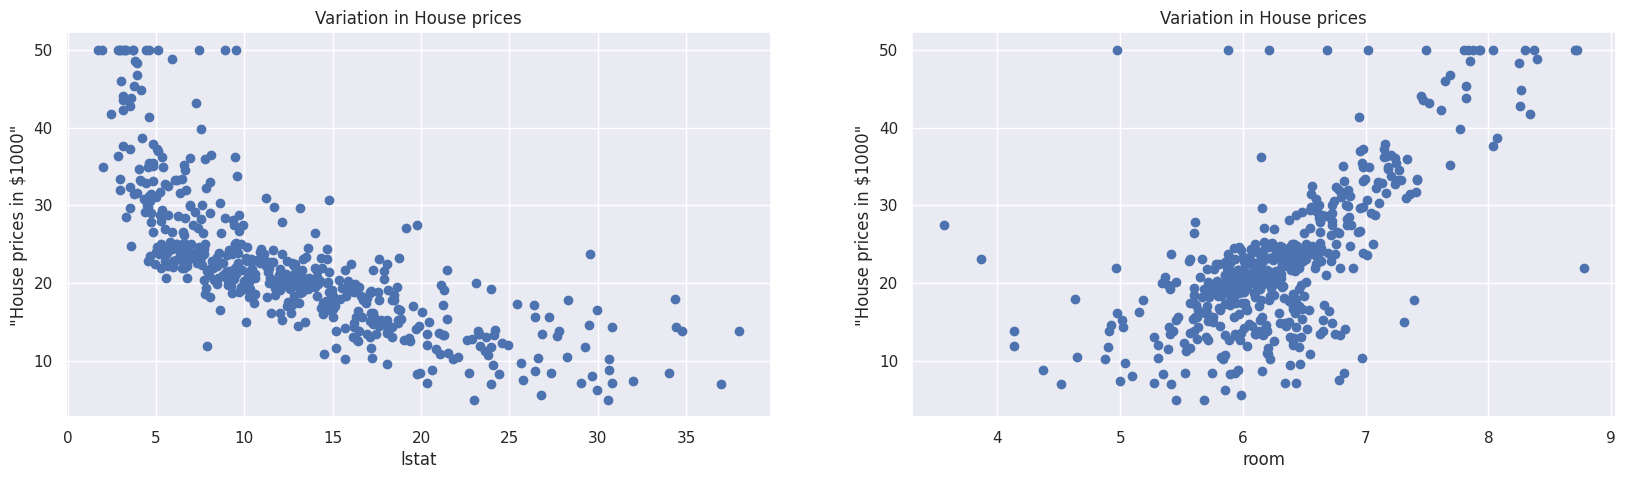

In [ ]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'room']
target = bos['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')



*   The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
*   The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.



Based on the above observations we will plot an lmplot between "rm" (room number) and "medv" (house price) to see the relationship between the two more clearly.

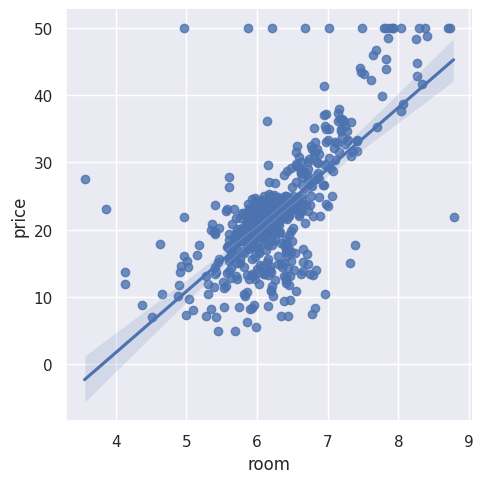

In [ ]:
sns.lmplot(x = 'room', y = 'price', data = bos);

<b>=============================  EXERCISE  =============================</b>


<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 1, correlation insights</div>
  <p>Using <code>bos</code> (the cleaned DataFrame), compute the correlation between each feature and <code>price</code>.</p>
  <ul>
    <li>List the <b>top 3 positively</b> correlated features with <code>price</code>.</li>
    <li>List the <b>top 3 negatively</b> correlated features with <code>price</code>.</li>
    <li>In 1–2 sentences, comment on whether your results match the heatmap above.</li>
  </ul>
</div>


In [ ]:
# TODO: Exercise 1 solution area

# 1) Compute correlations:
# - Use bos.corr(numeric_only=True) if needed, then extract correlations with "price".
# - Example target series: corr_with_price = corr["price"].drop("price")

# 2) Top 3 positively correlated features with price:
# - pos3 = ...

# 3) Top 3 negatively correlated features with price:
# - neg3 = ...

# 4) Brief comment (1–2 sentences):
# - Do the strongest positives/negatives match what you observed in the heatmap?

# 5) Optional verification:
# - Print your top/bottom correlations and compare visually to the heatmap.

# TODO


<details>
  <summary>✅ Show answer (Exercise 1) </summary>

```python
# Correlation of each numeric feature with price (Pearson correlation)
corr_with_price = bos.corr(numeric_only=True)["price"].drop("price").sort_values()

print("Top 3 positive correlations with price:")
print(corr_with_price.tail(3))

print("\nTop 3 negative correlations with price:")
print(corr_with_price.head(3))
```

<b>Explanation</b>
<ul> <li><code>bos.corr()</code> computes the <b>Pearson correlation</b>, which measures <b>linear association</b> between variables.</li> <li>We take the <code>"price"</code> column, drop <code>price</code> itself (which would otherwise be 1.0), then sort to find the strongest relationships.</li> <li>The most positive and most negative features should broadly align with the colour intensity in the heatmap, although small differences can occur due to scaling or rounding in the plot.</li> </ul>
</details>


<b>===================================================================</b>


## 1.4 Simple Linear Regression

Since it is really hard to visualize with the multiple features, we will 1st predict the house price with just one variable and then move to the regression with all features. Since you saw that ‘room’ shows positive correlation with the House Prices we will use this variable.

In [ ]:
X_rooms = bos.room
y_price = bos.price
X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


These both have the dimensions of [506,1]

### 1.4.1 Splitting the data into train and test sets

Since we need to test our model, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data.
To split the data we use train_test_split function provided by scikit-learn library. We finally print the shapes of our training and test set to verify if the splitting has occurred properly.

In [ ]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


The train has the output of [404,1] and test data is of the size [102,1].

### 1.4.2 Training and testing the model

Here we use scikit-learn’s LinearRegression to train our model on both the training and check it on the test sets, and check the model performance on the train dataset.

In [ ]:
reg_1 = LinearRegression()                 # Create an Ordinary Least Squares (OLS) linear regression model
reg_1.fit(X_train_1, Y_train_1)            # Fit the model on the training data (learn coefficients + intercept)

y_train_predict_1 = reg_1.predict(X_train_1)  # Predict prices for the training set using the fitted model

# RMSE (Root Mean Squared Error), average prediction error in target units (lower is better)
rmse = np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1))

# R² (coefficient of determination), proportion of variance explained by the model (higher is better, max ~1)
r2 = round(reg_1.score(X_train_1, Y_train_1), 2)  # score(...) returns R² for regression models in Scikit-Learn

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [ ]:
y_pred_1 = reg_1.predict(X_test_1)  # Predict prices for the test set (unseen data) to assess generalisation

# RMSE on the test set, typical prediction error magnitude in the same units as the target (lower is better)
rmse = np.sqrt(mean_squared_error(Y_test_1, y_pred_1))

# R² on the test set, how much variance in the unseen targets is explained (higher is better)
r2 = round(reg_1.score(X_test_1, Y_test_1), 2)  # score(...) returns R² for regression models

print("The model performance for testing set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")


The model performance for testing set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




The coefficient of determination: 1 is perfect
prediction

In [ ]:
print('Coefficient of determination: {:.4f}'.format(metrics.r2_score(Y_test_1, y_pred_1)))

Coefficient of determination: 0.6938


Plotting the model fitted line on the output variable.

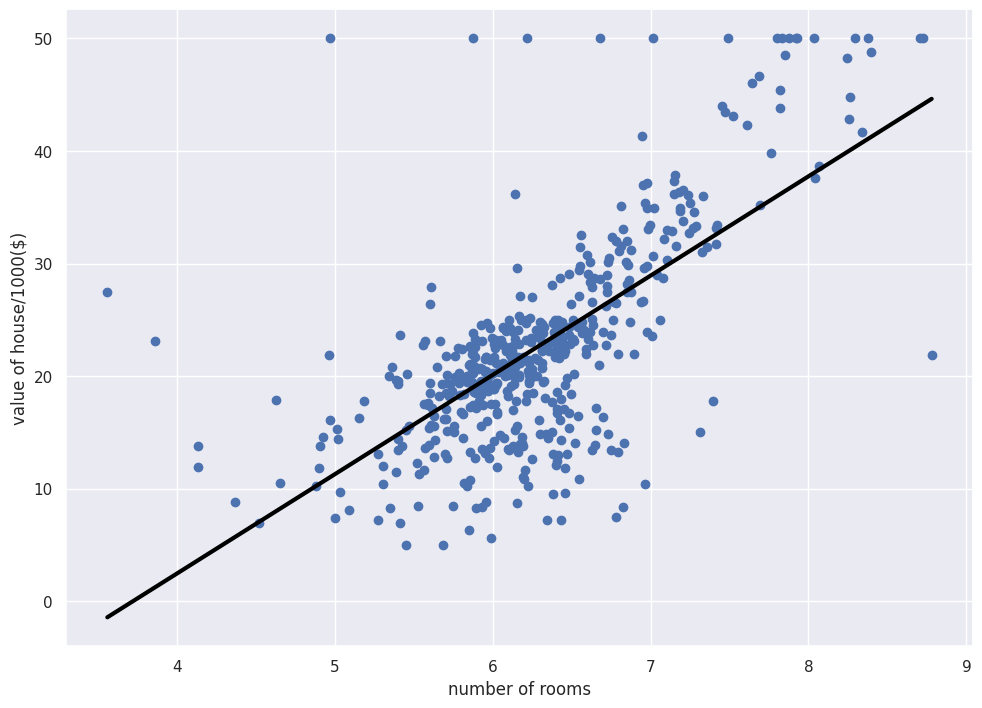

In [ ]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

45-Degree Plot:

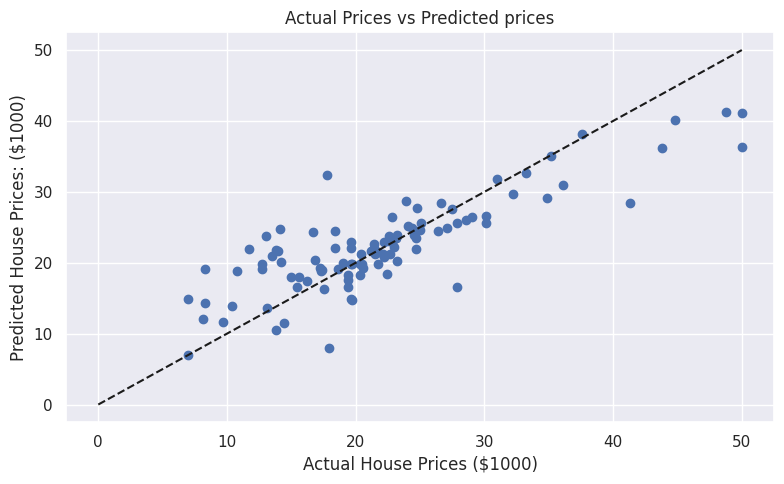

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(Y_test_1, y_pred_1);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

<b>=============================  EXERCISE  =============================</b>


<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 2, simple regression with <code>lstat</code></div>
  <p>Repeat the <b>simple linear regression</b>, but use <code>lstat</code> instead of <code>room</code>.</p>
  <ul>
    <li>Do a train/test split using the same <code>test_size</code> and <code>random_state</code> pattern.</li>
    <li>Report RMSE and R² on the test set.</li>
    <li>Create the fitted-line plot (scatter + prediction line) as you did for <code>room</code>.</li>
  </ul>
</div>


In [ ]:
# TODO: Exercise 2 solution area

# Goal:
# Repeat the simple linear regression, but use "lstat" as the single feature instead of "room".

# 1) Select X and y:
# - X should be a 2D array/DataFrame with only the "lstat" column
# - y should be the target "price"
# X = ...
# y = ...

# 2) Train/test split (use the same pattern as Exercise 1):
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=..., random_state=...
# )

# 3) Fit a LinearRegression model:
# model = LinearRegression()
# model.fit(X_train, y_train)

# 4) Evaluate on the test set:
# y_pred = model.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = model.score(X_test, y_test)

# 5) Plot (scatter + fitted line):
# - Scatter: X_test vs y_test
# - Line: sort X_test (or create a linspace) and plot predictions

<details>
  <summary>✅ Show answer (Exercise 2) </summary>

```python
# Use lstat as the single feature (X) and price as the target (y)
X_lstat = bos[["lstat"]].to_numpy()   # 2D array required by Scikit-Learn
y_price = bos["price"].to_numpy()     # 1D target array is the standard convention

# Train/test split (same pattern as Exercise 1)
X_train, X_test, y_train, y_test = train_test_split(
    X_lstat, y_price, test_size=0.2, random_state=5
)

# Fit simple linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate on the test set
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = reg.score(X_test, y_test)

print(f"RMSE: {rmse:.3f}")
print(f"R^2:  {r2:.3f}")

# Plot: scatter (data) + fitted line (model prediction)
x_line = np.linspace(X_lstat.min(), X_lstat.max(), 200).reshape(-1, 1)
y_line = reg.predict(x_line)

plt.scatter(X_lstat, y_price)
plt.plot(x_line, y_line, linewidth=3)
plt.xlabel("lstat")
plt.ylabel("price ($1000)")
plt.title("Simple linear regression: price vs lstat")
plt.show()
```

<b>Explanation</b>
<ul> <li><code>lstat</code> typically has a strong <b>negative</b> correlation with <code>price</code>, so the fitted line should slope downwards.</li> <li>RMSE reports the typical prediction error magnitude (in the same units as <code>price</code>), while R² summarises explained variance.</li> <li>Using the same <code>random_state</code> keeps your split reproducible, so your results should match across runs.</li> </ul>
</details>


<b>===================================================================</b>


## 1.5 Multiple Linear Regression

Now we will create a model considering all the features in the dataset. The process is almost the same and also the evaluation model but in this case the visualization will not be possible in a 2D space.

- Use the `train_test_split` to split the data into random train and test subsets.
- Everytime you run it without specifying `random_state`, you will get a different result.
- If you use `random_state=some_number`, then you can guarantee the split will be always the same.
- It doesn't matter what the value of `random_state` is:  42, 0, 21, ...
- This is useful if you want reproducible results.

In [ ]:
X = bos.drop('price', axis = 1)
y = bos['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#The linear regression model:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.754396542087904
R2 score is 0.74




In [ ]:
# Model Evaluation for Test Set
y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for testing set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for testing set
--------------------------------------
Root Mean Squared Error: 4.772599769922687
R^2: 0.69




we can see how our model is predicting by plotting a scatter plot between the original house price and predicted house prices.

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

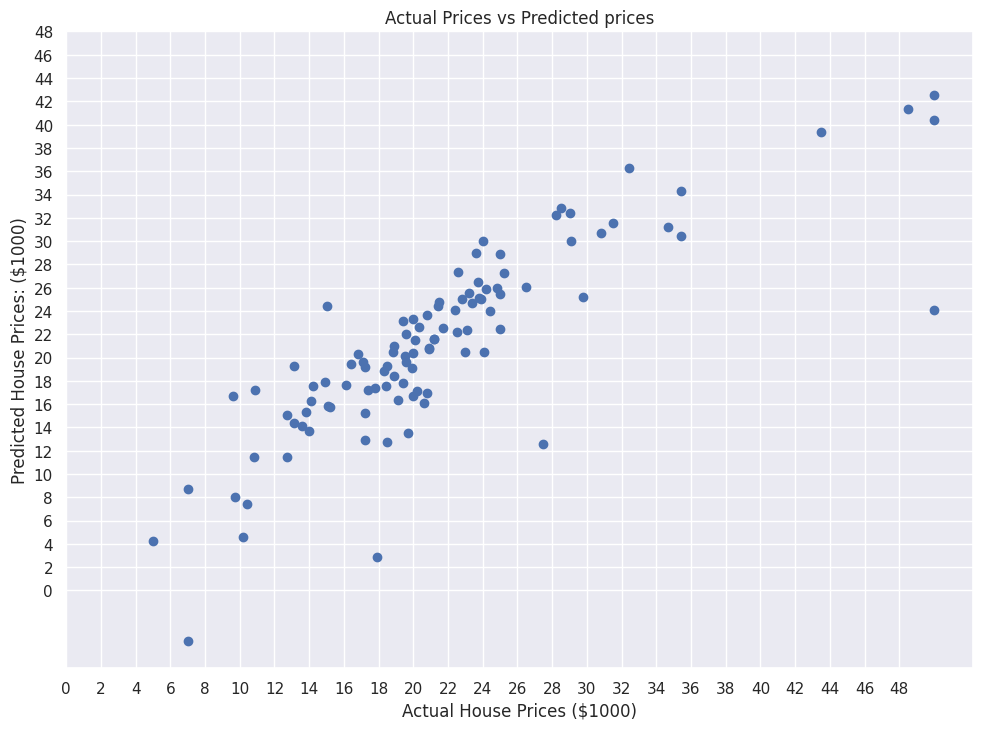

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")

<b>=============================  EXERCISE  =============================</b>


<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 3, multicollinearity check</div>
  <p>In the correlation matrix, <code>rad</code> and <code>tax</code> are highly correlated (multicollinearity risk).</p>
  <ul>
    <li>Train <b>two</b> multiple linear regression models, one dropping <code>tax</code>, and one dropping <code>rad</code>.</li>
    <li>Compare their RMSE and R² on the test set.</li>
    <li>In one sentence, state which choice you would prefer, and why.</li>
  </ul>
</div>



In [ ]:
# TODO: Exercise 3
# Start from X = bos.drop('price', axis=1)

<details>
  <summary>✅ Show answer (Exercise 3) </summary>

```python
from sklearn.metrics import mean_squared_error

def eval_model(X, y, drop_col=None):
    X_use = X.drop(columns=[drop_col]) if drop_col else X
    X_train, X_test, y_train, y_test = train_test_split(X_use, y, test_size=0.2, random_state=42)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = reg.score(X_test, y_test)
    return rmse, r2

X = bos.drop('price', axis=1)
y = bos['price']

rmse_drop_tax, r2_drop_tax = eval_model(X, y, drop_col='tax')
rmse_drop_rad, r2_drop_rad = eval_model(X, y, drop_col='rad')

print(f'Drop tax -> RMSE: {rmse_drop_tax:.3f}, R^2: {r2_drop_tax:.3f}')
print(f'Drop rad -> RMSE: {rmse_drop_rad:.3f}, R^2: {r2_drop_rad:.3f}')
```

<b>Explanation</b>
<ul>
  <li>Highly correlated predictors can make coefficients unstable, even if overall prediction performance is similar.</li>
  <li>This quick comparison focuses on generalisation metrics (test RMSE/R²) rather than coefficient interpretability.</li>
  <li>In practice, you might also use regularisation (Ridge/Lasso) to mitigate multicollinearity.</li>
</ul>
</details>


<b>===================================================================</b>


Error distribution:

/tmp/ipython-input-1236769786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred);


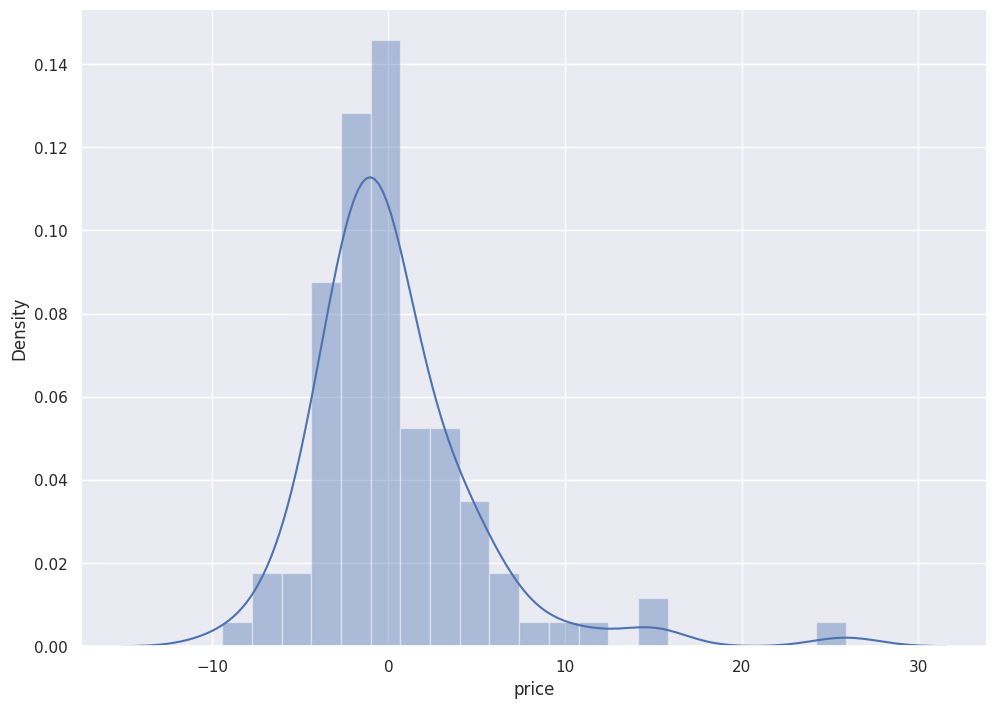

In [ ]:
sns.distplot(y_test - y_pred);

45-Degree Plot:

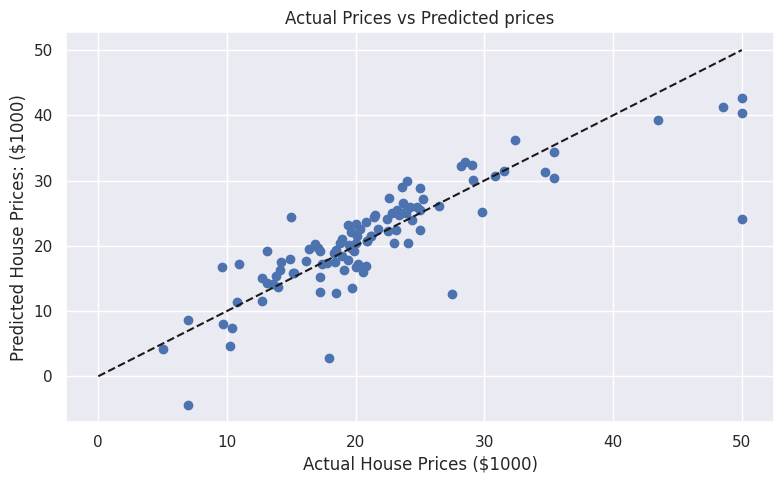

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, y_pred);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

## Choosing the Best Model: k-Fold Cross-Validation

- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
- It is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.
- We use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
- The biggest advantage of this method is that every data point is used for validation exactly once and for training `k-1` times.
- To choose the final model to use, we select the one that has the lowest validation error.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into `k` groups
3. For each unique group:
       3.1 Take the group as a hold out or test data set
       3.2 Take the remaining k-1 groups as a training data set
       3.3 Fit a model on the training set and evaluate it on the test set
       3.4 Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

How to choose **k**?
- A poorly chosen value for **k** may result in a mis-representative idea of the skill of the model, such as a score with a high variance, or a high bias.
- The choice of **k** is usually 5 or 10, but there is no formal rule. As **k** gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.
- A value of **k=10** is very common in the field of applied machine learning, and is recommend if you are struggling to choose a value for your dataset.

Below is the visualization of a k-fold validation when k=5.
![FIG_kFold](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
Image Source: https://scikit-learn.org/



              Linear: -25.30, 6.52
               Lasso: -29.76, 5.24
          ElasticNet: -29.42, 4.63
               Ridge: -25.38, 6.60
       BayesianRidge: -26.03, 6.19
                 KNN: -38.13, 2.61
        DecisionTree: -29.67, 10.73
                 SVR: -72.62, 14.27
            AdaBoost: -17.18, 3.53
       GradientBoost: -12.42, 2.24
        RandomForest: -13.96, 3.92


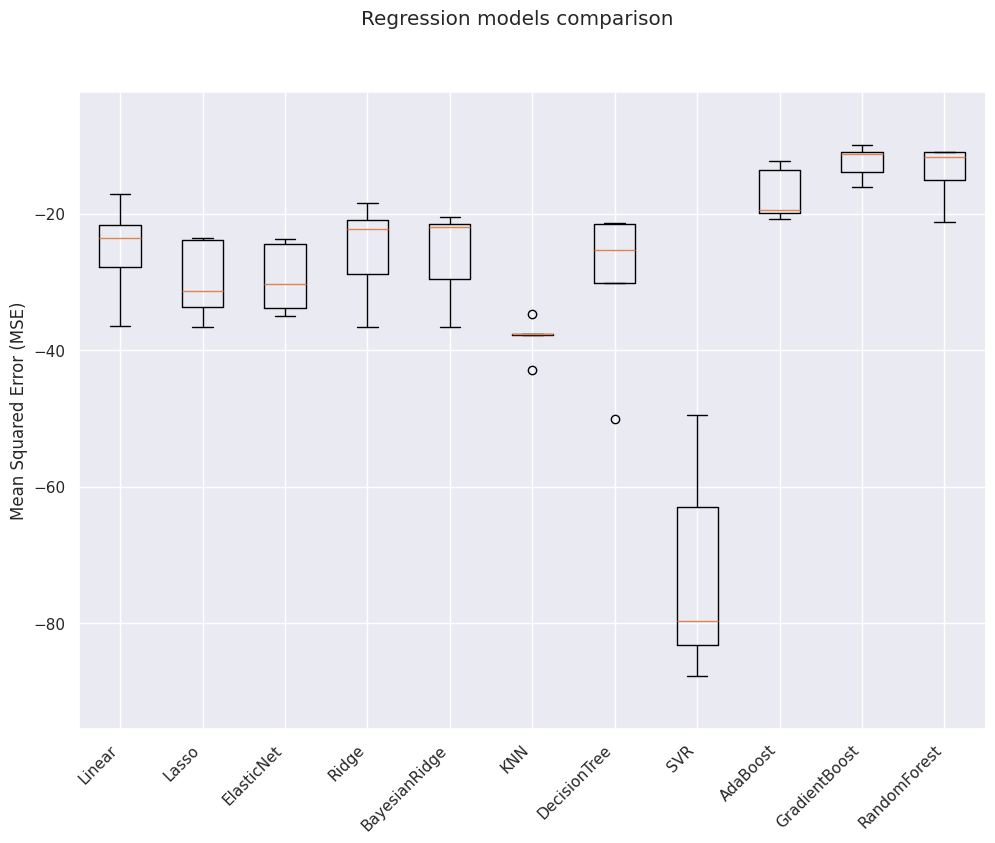

In [ ]:
# import warnings filter
from warnings import simplefilter              # Utility to configure Python warning behaviour

# ignore all future warnings
simplefilter(action="ignore", category=FutureWarning)  # Hide FutureWarning messages (keeps notebook output clean)

from sklearn.model_selection import KFold       # K-fold cross-validation splitter
from sklearn.model_selection import cross_val_score  # Evaluate a model with cross-validation and return fold scores

# A set of regression models we will compare under the same evaluation protocol
from sklearn.linear_model import LinearRegression  # Ordinary Least Squares baseline (no regularisation)
from sklearn.linear_model import Lasso             # L1-regularised linear regression (can drive some coefficients to 0)
from sklearn.linear_model import ElasticNet        # Mix of L1 and L2 regularisation (useful when features are correlated)
from sklearn.linear_model import Ridge             # L2-regularised linear regression (shrinks coefficients, helps stability)
from sklearn.linear_model import BayesianRidge     # Bayesian linear regression with automatic regularisation
from sklearn.tree import DecisionTreeRegressor     # Non-linear tree model (can overfit without tuning)
from sklearn.neighbors import KNeighborsRegressor  # Instance-based regression (predict using nearest neighbours)
from sklearn.svm import SVR                        # Support Vector Regression (often strong with proper scaling/tuning)
from sklearn.ensemble import AdaBoostRegressor     # Boosting ensemble (sequentially improves weak learners)
from sklearn.ensemble import GradientBoostingRegressor  # Gradient boosting trees (strong non-linear baseline)
from sklearn.ensemble import RandomForestRegressor # Bagging ensemble of trees (robust, reduces variance)

# user variables to tune
seed   = 9                          # Random seed for reproducibility (affects fold shuffling and some model randomness)
folds  = 5                          # Number of CV folds (despite comment below, this is 5-fold, not 10-fold)
metric = "neg_mean_squared_error"   # Scikit-Learn convention, larger is better, so MSE is returned as negative

# hold different regression models in a single dictionary
models = dict()                     # Dictionary mapping a readable name -> instantiated model object
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()

# K-fold cross validation for each model
model_results = list()              # Store the per-fold CV scores for each model (for the boxplot)
model_names   = list()              # Store model names in the same order as model_results

for model_name in models:
    model = models[model_name]      # Select the model instance

    # Create the CV splitter:
    # - shuffle=True randomises row order before splitting (important if data has any ordering)
    # - random_state controls reproducibility of the shuffle
    k_fold = KFold(n_splits=folds, shuffle=True, random_state=seed)

    # Compute cross-validated scores on the TRAINING data only:
    # scoring="neg_mean_squared_error" returns NEGATIVE values, closer to 0 is better
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)

    model_results.append(results)   # Keep all fold scores for the boxplot
    model_names.append(model_name)

    # Print mean and standard deviation across folds (still negative MSE)
    print("{:>20}: {:.2f}, {:.2f}".format(
        model_name, round(results.mean(), 3), round(results.std(), 3)
    ))

# box-whisker plot to compare regression models
figure = plt.figure()                              # Create a new figure
figure.suptitle("Regression models comparison")     # Figure title

ax = figure.add_subplot(111)                        # Single subplot
plt.boxplot(model_results)                          # Boxplot of fold scores for each model
ax.set_xticklabels(model_names, rotation=45, ha="right")  # Label each box with the model name
ax.set_ylabel("Mean Squared Error (MSE)")           # Y-axis label (note: values are NEGATIVE MSE in this plot)
plt.margins(0.05, 0.1)                              # Add margins so labels do not get cut off

# plt.savefig("model_mse_scores.png")               # Optional, save figure to file
plt.show()                                          # Display the plot in the notebook

# plt.clf()                                         # Optional, clear the figure
# plt.close()                                       # Optional, close the figure window


**Based on the above comparison, we can see that `Gradient Boosting Regression` and `Random Forest` models outperform all the other regression models.**

<b>=============================  EXERCISE  =============================</b>


<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 4, k-fold CV for a chosen model</div>
  <p>Pick one model from the cross-validation comparison (for example <code>Ridge</code> or <code>RandomForest</code>) and run k-fold CV.</p>
  <ul>
    <li>Use <code>folds = 5</code> and the same <code>metric</code> as the notebook.</li>
    <li>Print the mean and standard deviation of the CV scores.</li>
    <li>Explain what a <b>more negative</b> score means here.</li>
  </ul>
</div>


In [ ]:
# TODO: Exercise 4
# Hint: cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)

<details>
  <summary>✅ Show answer (Exercise 4) </summary>

```python
k_fold = KFold(n_splits=5, shuffle=True, random_state=9)
model = Ridge()
results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
print(f'Mean CV score: {results.mean():.3f}')
print(f'Std  CV score: {results.std():.3f}')

print('Note: the score is NEGATIVE MSE, so values closer to 0 are better (lower MSE).')
```

<b>Explanation</b>
<ul>
  <li>With <code>neg_mean_squared_error</code>, scikit-learn returns the negative value so that higher is better by convention.</li>
  <li>A more negative score implies a larger MSE, which is worse predictive performance.</li>
  <li>The standard deviation gives a sense of how sensitive the model is to the specific train/validation split.</li>
</ul>
</details>


<b>===================================================================</b>


## Model with Gradient Boosted Tree

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_predicted = gbr.predict(X_test)
gbr_expected = y_test

**Root Mean Square Error:**

In [ ]:
print("RMSE: %r " % np.sqrt(np.mean((gbr_predicted - gbr_expected) ** 2)))

RMSE: np.float64(2.4981129386486978) 


**The coefficient of determination**: (1 is
perfect prediction)

In [ ]:
print('Coeff of determination: {:.4f}'.format(metrics.r2_score(gbr_expected, gbr_predicted)))

Coeff of determination: 0.9149


Error Distribution:

/tmp/ipython-input-1139304170.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gbr_expected - gbr_predicted);


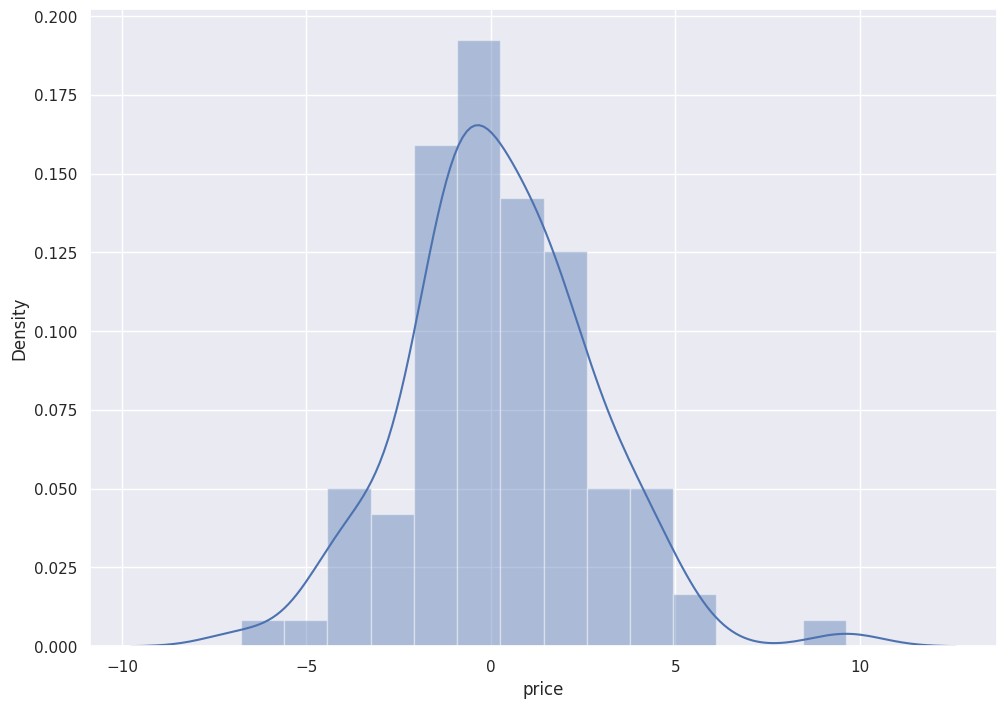

In [ ]:
sns.distplot(gbr_expected - gbr_predicted);

45-Degree Plot:

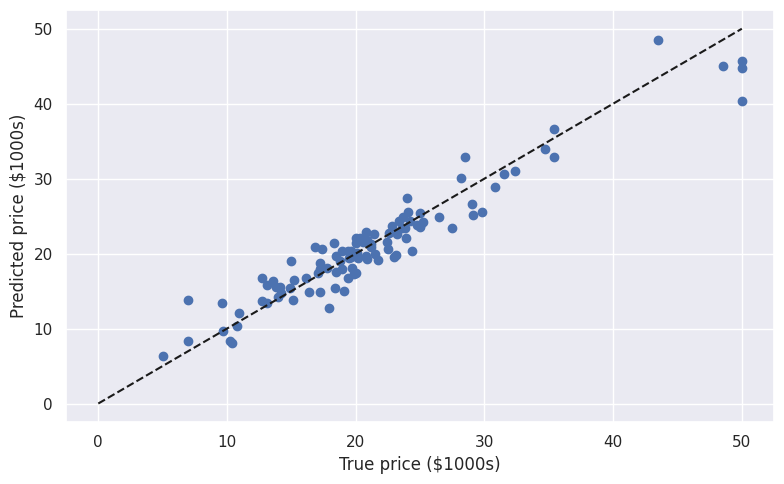

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(gbr_expected, gbr_predicted)
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel('True price ($1000s)');
plt.ylabel('Predicted price ($1000s)');
plt.tight_layout();

Zoom in:

In [ ]:
df1 = pd.DataFrame({'Actual': gbr_expected, 'Predicted': gbr_predicted})
df2 = df1.head(10)
df2

,Actual,Predicted
173,23.6,23.405728
274,32.4,31.041474
491,13.6,16.289685
72,22.8,23.738168
452,16.1,16.705605
76,20.0,22.140148
316,17.8,18.086533
140,14.0,14.162601
471,19.6,20.307280
500,16.8,20.831689


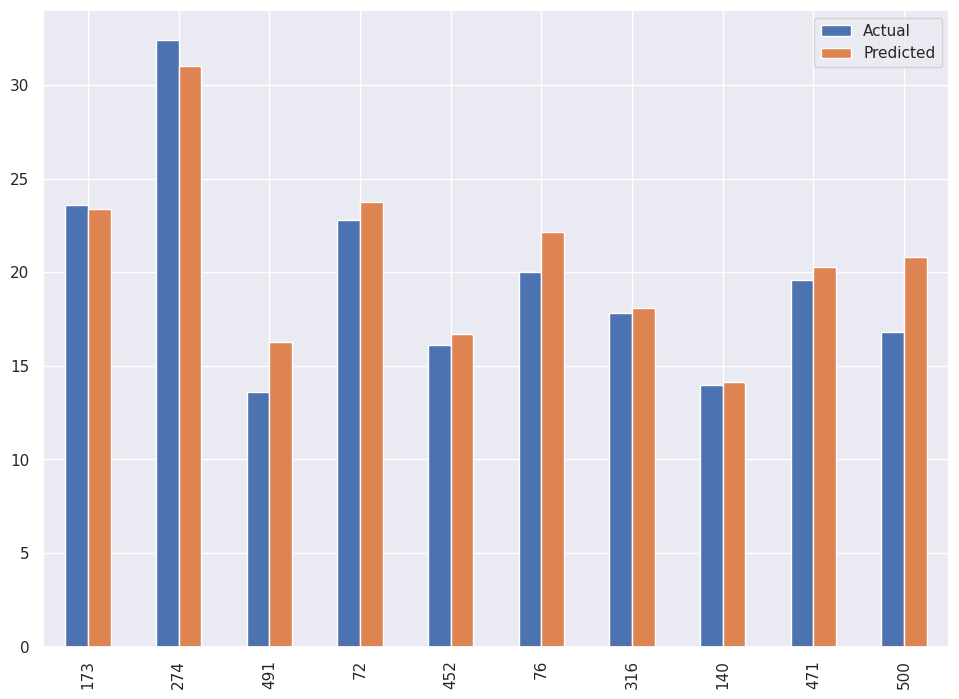

In [ ]:
df2.plot(kind='bar');

<b>=============================  EXERCISE  =============================</b>


<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 5, tune gradient boosting</div>
  <p>Gradient boosted trees have several important hyperparameters.</p>
  <ul>
    <li>Train two <code>GradientBoostingRegressor</code> models with different settings (e.g., <code>n_estimators</code>, <code>learning_rate</code>, <code>max_depth</code>).</li>
    <li>Evaluate both on the same test set using RMSE and R².</li>
    <li>State which setting performed better.</li>
  </ul>
</div>


In [ ]:
# TODO: Exercise 5
# Keep the same X_train, X_test, y_train, y_test created earlier

<details>
  <summary>✅ Show answer (Exercise 5) </summary>

```python
from sklearn.ensemble import GradientBoostingRegressor

def eval_gbr(params):
    gbr = GradientBoostingRegressor(random_state=42, **params)
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = metrics.r2_score(y_test, pred)
    return rmse, r2

params_a = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
params_b = {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 3}

rmse_a, r2_a = eval_gbr(params_a)
rmse_b, r2_b = eval_gbr(params_b)

print('Model A', params_a, f'-> RMSE: {rmse_a:.3f}, R^2: {r2_a:.3f}')
print('Model B', params_b, f'-> RMSE: {rmse_b:.3f}, R^2: {r2_b:.3f}')
```

<b>Explanation</b>
<ul>
  <li>Increasing <code>n_estimators</code> generally increases model capacity, but can overfit if not controlled.</li>
  <li>Lower <code>learning_rate</code> often needs more estimators to reach similar training performance.</li>
  <li>You should always compare on the same test split to make the comparison fair.</li>
</ul>
</details>


<b>===================================================================</b>


#### Feature Importance
- Once we have a trained model, we can understand feature importance (or variable importance) of the dataset which tells us how important each feature is, to predict the target.

In [ ]:
bos.feature_names = ['crim','zn','indus','chas','nox','room','age','dis','rad','tax','ptratio','lstat']

/tmp/ipython-input-3435592232.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bos.feature_names = ['crim','zn','indus','chas','nox','room','age','dis','rad','tax','ptratio','lstat']


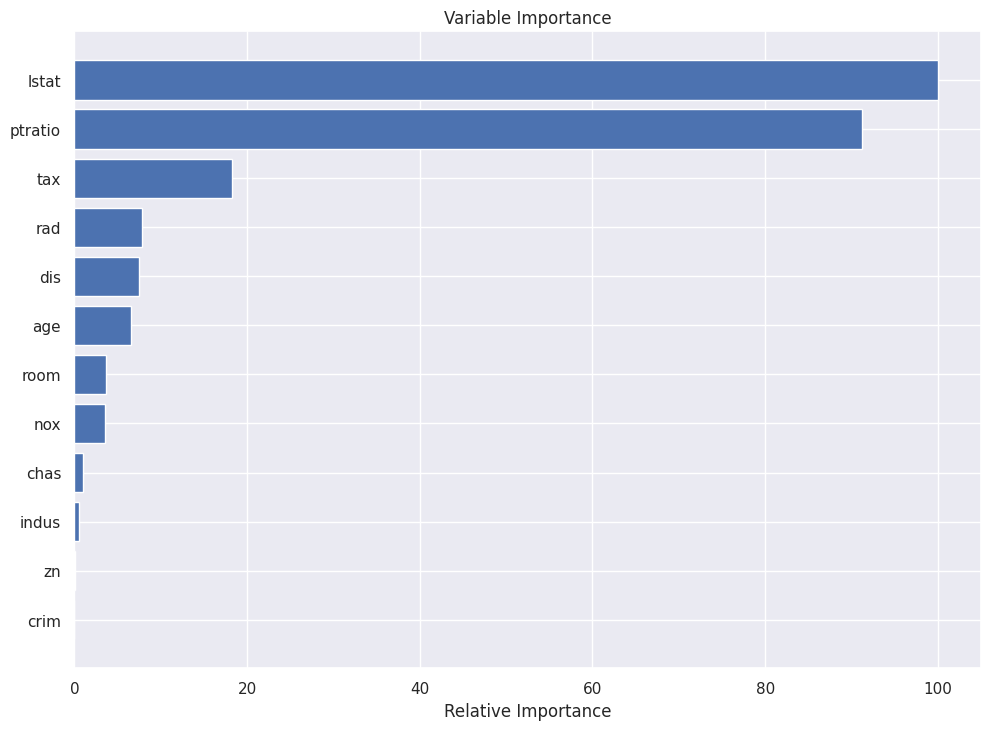

In [ ]:
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center');
plt.yticks(pos, bos.feature_names);
plt.xlabel('Relative Importance');
plt.title('Variable Importance');

<b>=============================  EXERCISE  =============================</b>


<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 6, interpret feature importance</div>
  <p>Using <code>feature_importance</code> (from the boosted model), list the <b>top 3</b> most important features.</p>
  <ul>
    <li>Print the feature names with their relative importance values.</li>
    <li>In one sentence, explain what feature importance means for tree ensembles.</li>
  </ul>
</div>


In [ ]:
# TODO: Exercise 6
# Hint: sort feature_importance descending

<details>
  <summary>✅ Show answer (Exercise 6) </summary>

```python
fi = gbr.feature_importances_
fi_rel = 100.0 * (fi / fi.max())

pairs = list(zip(bos.feature_names, fi_rel))
pairs_sorted = sorted(pairs, key=lambda x: x[1], reverse=True)

print('Top 3 features:')
for name, val in pairs_sorted[:3]:
    print(f'{name:>10}: {val:.1f}')

print('Tree feature importance reflects how much a feature reduces error when used in splits across the ensemble.')
```

<b>Explanation</b>
<ul>
  <li>We pair each feature name with its importance score, then sort in descending order.</li>
  <li>In tree ensembles, importance is related to impurity reduction (or loss reduction) contributed by a feature.</li>
  <li>Importance is not the same as causality, it is a predictive signal within this dataset.</li>
</ul>
</details>


<b>===================================================================</b>


<b>✅ Week 5 Tutorial Complete</b>

<p>
  This concludes <b>Week 5, Supervised Learning, Regression</b>.
  You should now be able to set up a supervised learning regression pipeline in Scikit-Learn, explore feature–target relationships using correlation, train and evaluate simple and multiple linear regression models using RMSE and R², recognise multicollinearity effects, and compare a range of regression models using cross-validation.
</p>
